# Import Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

In [84]:
#Train Set
train_set = pd.read_excel('Data_Train.xlsx')

In [85]:
train_set.head() # let's look at the first few rows of the train set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [86]:
#Test Set
test_set = pd.read_excel('Test_set.xlsx') # let's look at the first few rows of the test set

In [87]:
#test_set.head()

In [88]:
#Checking the shape of the Train Data 
train_set.shape

(10683, 11)

In [89]:
#Checking the shape of the Test Data 
test_set.shape

(2671, 10)

##### By Compareing the Train, Test Data set in Test Data Set Price Columen is not present so we need to predict the Price

In [90]:
# Looking at all the column names in Train Set
train_set.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [91]:
#Looking at all the column names in Test Set
test_set.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [92]:
train_set.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [93]:
# looking at type of the columns and missing values
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [94]:
# Dealing with the Missing Value by using dropna method

print("Length of Training Set : ", len(train_set))

train_set = train_set.dropna()

print("After dropping NaN values Length of Training Set: ", len(train_set))


Length of Training Set :  10683
After dropping NaN values Length of Training Set:  10682


In [95]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [96]:
print("Length of Testing Set : ", len(test_set))

Length of Testing Set :  2671


Text(0.5,0,'Price')

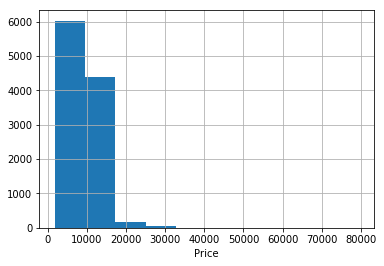

In [97]:
train_set['Price'].hist(bins=10)
plt.xlabel('Price')

## Cleaning Data

### Date_of_Journey

In [98]:
#Cleaning Journey Date 
#Training Set

train_set['Journey_Day'] = pd.to_datetime(train_set.Date_of_Journey, format='%d/%m/%Y').dt.day

train_set['Journey_Month'] = pd.to_datetime(train_set.Date_of_Journey, format='%d/%m/%Y').dt.month

train_set['Journey_Year'] = pd.to_datetime(train_set.Date_of_Journey, format='%d/%m/%Y').dt.year


# Test Set

test_set['Journey_Day'] = pd.to_datetime(test_set.Date_of_Journey, format='%d/%m/%Y').dt.day

test_set['Journey_Month'] = pd.to_datetime(test_set.Date_of_Journey, format='%d/%m/%Y').dt.month

test_set['Journey_Year'] = pd.to_datetime(test_set.Date_of_Journey, format='%d/%m/%Y').dt.year



# Compare the dates and delete the original date feature

train_set.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

test_set.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [99]:
#After Modifing Date Feature Train Set
train_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [100]:
#After Modifing Date Feature Test Set
test_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


### Duration

In [101]:
# Cleaning Duration
# Train Set

duration = list(train_set['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
train_set['Duration_hours'] = dur_hours
train_set['Duration_minutes'] =dur_minutes
train_set.drop(labels = 'Duration', axis = 1, inplace = True)


In [102]:
# Here we will split the Duration in to two features Duration_hours and Duration_minutes
train_set.tail()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_hours,Duration_minutes
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,non-stop,No info,4107,9,4,2019,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,non-stop,No info,4145,27,4,2019,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,non-stop,No info,7229,27,4,2019,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,non-stop,No info,12648,1,3,2019,2,40
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,2 stops,No info,11753,9,5,2019,8,20


In [103]:
# Test Set
durationT = list(test_set['Duration'])

for i in range(len(durationT)) :
    if len(durationT[i].split()) != 2:
        if 'h' in durationT[i] :
            durationT[i] = durationT[i].strip() + ' 0m'
        elif 'm' in durationT[i] :
            durationT[i] = '0h {}'.format(durationT[i].strip())
            
dur_hours = []
dur_minutes = []  

for i in range(len(durationT)) :
    dur_hours.append(int(durationT[i].split()[0][:-1]))
    dur_minutes.append(int(durationT[i].split()[1][:-1]))
  
    
test_set['Duration_hours'] = dur_hours
test_set['Duration_minutes'] = dur_minutes
test_set.drop(labels = 'Duration', axis = 1, inplace = True)

In [104]:
test_set.tail()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Duration_hours,Duration_minutes
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,1 stop,No info,6,6,2019,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,non-stop,No info,27,3,2019,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,1 stop,No info,6,3,2019,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,1 stop,No info,6,3,2019,15,15
2670,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,1 stop,No info,15,6,2019,14,20


### Departure Time and Arrival Time

In [105]:
#Cleaning Departure Time and Arrival Time

# Train Set

train_set['Depart_Time_Hour'] = pd.to_datetime(train_set.Dep_Time).dt.hour
train_set['Depart_Time_Minutes'] = pd.to_datetime(train_set.Dep_Time).dt.minute

# Delete Departure Time feature

train_set.drop(labels = 'Dep_Time', axis = 1, inplace = True)


train_set['Arr_Time_Hour'] = pd.to_datetime(train_set.Arrival_Time).dt.hour
train_set['Arr_Time_Minutes'] = pd.to_datetime(train_set.Arrival_Time).dt.minute

# Delete Arrival Time feature

train_set.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [106]:
train_set.tail() # After Cleaning Departure Time and Arrival Time in Train Set

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,3,0,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,2,40,11,30,14,10
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,11753,9,5,2019,8,20,10,55,19,15


In [107]:
# Test Set

test_set['Depart_Time_Hour'] = pd.to_datetime(test_set.Dep_Time).dt.hour
test_set['Depart_Time_Minutes'] = pd.to_datetime(test_set.Dep_Time).dt.minute

# Delete Departure Time feature

test_set.drop(labels = 'Dep_Time', axis = 1, inplace = True)

test_set['Arr_Time_Hour'] = pd.to_datetime(test_set.Arrival_Time).dt.hour
test_set['Arr_Time_Minutes'] = pd.to_datetime(test_set.Arrival_Time).dt.minute

# Delete Arrival Time feature

test_set.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [109]:
test_set.tail() # After Cleaning Departure Time and Arrival Time in Test Set

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,2019,23,55,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,2019,2,35,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,2019,6,35,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,2019,15,15,4,0,19,15
2670,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,15,6,2019,14,20,4,55,19,15


## Preprocessing the Data

### Classifying the Dependent Variable and Independent Variable

In [112]:
# Dependent Variable index 6 is the "Price" in Train Set 

Y_train = train_set.iloc[:,6].values

# Independent Variables Select all columns expect "Price"

X_train = train_set.iloc[:,train_set.columns != 'Price'].values


# Independent Variables for Test Set here "price" is not there we need to predict

X_test = test_set.iloc[:,:].values

In [116]:
Y_train # Dependent Variable on Train Set

array([ 3897,  7662, 13882, ...,  7229, 12648, 11753], dtype=int64)

In [117]:
X_train  # Independent Variables on Train Set

array([['IndiGo', 'Banglore', 'New Delhi', ..., 20, 1, 10],
       ['Air India', 'Kolkata', 'Banglore', ..., 50, 13, 15],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 25, 4, 25],
       ...,
       ['Jet Airways', 'Banglore', 'Delhi', ..., 20, 11, 20],
       ['Vistara', 'Banglore', 'New Delhi', ..., 30, 14, 10],
       ['Air India', 'Delhi', 'Cochin', ..., 55, 19, 15]], dtype=object)

In [118]:
X_test # Independent Variables on Test Set

array([['Jet Airways', 'Delhi', 'Cochin', ..., 30, 4, 25],
       ['IndiGo', 'Kolkata', 'Banglore', ..., 20, 10, 20],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 15, 19, 0],
       ...,
       ['Jet Airways', 'Delhi', 'Cochin', ..., 50, 4, 25],
       ['Air India', 'Delhi', 'Cochin', ..., 0, 19, 15],
       ['Multiple carriers', 'Delhi', 'Cochin', ..., 55, 19, 15]],
      dtype=object)

## Encoding Categorical Variables

In [119]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

# Training Set    

X_train[:,0] = le1.fit_transform(X_train[:,0])

X_train[:,1] = le1.fit_transform(X_train[:,1])

X_train[:,2] = le1.fit_transform(X_train[:,2])

X_train[:,3] = le1.fit_transform(X_train[:,3])

X_train[:,4] = le1.fit_transform(X_train[:,4])

X_train[:,5] = le1.fit_transform(X_train[:,5])

# Test Set


X_test[:,0] = le2.fit_transform(X_test[:,0])

X_test[:,1] = le2.fit_transform(X_test[:,1])

X_test[:,2] = le2.fit_transform(X_test[:,2])

X_test[:,3] = le2.fit_transform(X_test[:,3])

X_test[:,4] = le2.fit_transform(X_test[:,4])

X_test[:,5] = le2.fit_transform(X_test[:,5])


In [122]:
# Data After Encoding Train Set
print(pd.DataFrame(X_train).head())

# or we can check
X_train

  0  1  2    3  4  5   6  7     8   9   10  11  12  13  14
0  3  0  5   18  4  8  24  3  2019   2  50  22  20   1  10
1  1  3  0   84  1  8   1  5  2019   7  25   5  50  13  15
2  4  2  1  118  1  8   9  6  2019  19   0   9  25   4  25
3  3  3  0   91  0  8  12  5  2019   5  25  18   5  23  30
4  3  0  5   29  0  8   1  3  2019   4  45  16  50  21  35


array([[3, 0, 5, ..., 20, 1, 10],
       [1, 3, 0, ..., 50, 13, 15],
       [4, 2, 1, ..., 25, 4, 25],
       ...,
       [4, 0, 2, ..., 20, 11, 20],
       [10, 0, 5, ..., 30, 14, 10],
       [1, 2, 1, ..., 55, 19, 15]], dtype=object)

In [123]:
# Data After Encoding Test Set
print(pd.DataFrame(X_test).head())

# or we can check
X_test

  0  1  2   3  4  5   6  7     8   9   10  11  12  13  14
0  4  2  1  76  0  5   6  6  2019  10  55  17  30   4  25
1  3  3  0  65  0  5  12  5  2019   4   0   6  20  10  20
2  4  2  1  76  0  3  21  5  2019  23  45  19  15  19   0
3  6  2  1  76  0  5  21  5  2019  13   0   8   0  21   0
4  0  0  2  16  4  5  24  6  2019   2  50  23  55   2  45


array([[4, 2, 1, ..., 30, 4, 25],
       [3, 3, 0, ..., 20, 10, 20],
       [4, 2, 1, ..., 15, 19, 0],
       ...,
       [4, 2, 1, ..., 50, 4, 25],
       [1, 2, 1, ..., 0, 19, 15],
       [6, 2, 1, ..., 55, 19, 15]], dtype=object)

In [124]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


Y_train = Y_train.reshape((len(Y_train), 1)) 
Y_train = sc_X.fit_transform(Y_train)

Y_train = Y_train.ravel()

C:\Users\uer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\uer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\uer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\uer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\uer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to flo

In [125]:
X_train # After Scaling Train set

array([[-0.41080484, -1.65835945,  2.41653414, ..., -0.2349499 ,
        -1.80043628, -0.8900139 ],
       [-1.26115217,  0.89001433, -0.97381203, ...,  1.36360731,
        -0.05090913, -0.5870944 ],
       [ 0.01436882,  0.04055641, -0.2957428 , ...,  0.0314763 ,
        -1.3630545 ,  0.0187446 ],
       ...,
       [ 0.01436882, -1.65835945,  0.38232644, ..., -0.2349499 ,
        -0.34249699, -0.2841749 ],
       [ 2.56541078, -1.65835945,  2.41653414, ...,  0.2979025 ,
         0.0948848 , -0.8900139 ],
       [-1.26115217,  0.04055641, -0.2957428 , ...,  1.63003351,
         0.82385444, -0.5870944 ]])

In [129]:
print(pd.DataFrame(X_train).head())

         0         1         2         3         4         5         6   \
0 -0.410805 -1.658359  2.416534 -1.547082  1.407210  0.499921  1.237288   
1 -1.261152  0.890014 -0.973812  0.249946 -0.253703  0.499921 -1.475307   
2  0.014369  0.040556 -0.295743  1.175687 -0.253703  0.499921 -0.531796   
3 -0.410805  0.890014 -0.973812  0.440539 -0.807341  0.499921 -0.177979   
4 -0.410805 -1.658359  2.416534 -1.247577 -0.807341  0.499921 -1.475307   

         7    8         9         10        11        12        13        14  
0 -1.467402  0.0 -0.970614  1.279041  1.654154 -0.234950 -1.800436 -0.890014  
1  0.250289  0.0 -0.381999 -0.196319 -1.303113  1.363607 -0.050909 -0.587094  
2  1.109135  0.0  1.030677 -1.671678 -0.607286  0.031476 -1.363054  0.018745  
3  0.250289  0.0 -0.617445 -0.196319  0.958326 -1.034229  1.407030  0.321664  
4 -1.467402  0.0 -0.735168  0.983969  0.610412  1.363607  1.115442  0.624584  


In [130]:
print(pd.DataFrame(X_test).head())  # After Scaling Test set

         0         1         2         3         4         5         6   \
0  0.014369  0.040556 -0.295743  0.032124 -0.807341 -1.970848 -0.885613   
1 -0.410805  0.890014 -0.973812 -0.267380 -0.807341 -1.970848 -0.177979   
2  0.014369  0.040556 -0.295743  0.032124 -0.807341 -3.618027  0.883471   
3  0.864716  0.040556 -0.295743  0.032124 -0.807341 -1.970848  0.883471   
4 -1.686326 -1.658359  0.382326 -1.601537  1.407210 -1.970848  1.237288   

         7    8         9         10        11        12        13        14  
0  1.109135  0.0 -0.028830  1.574113  0.784369  0.297903 -1.363054  0.018745  
1  0.250289  0.0 -0.735168 -1.671678 -1.129156 -0.234950 -0.488291 -0.284175  
2  0.250289  0.0  1.501569  0.983969  1.132283 -0.501376  0.823854 -1.495853  
3  0.250289  0.0  0.324339 -1.671678 -0.781243 -1.300655  1.115442 -1.495853  
4  1.109135  0.0 -0.970614  1.279041  1.828111  1.630034 -1.654642  1.230423  


In [131]:
print(pd.DataFrame(Y_train).head())  # After Scaling Y Train set

          0
0 -1.125535
1 -0.309068
2  1.039783
3 -0.622209
4  0.914006


In [139]:
from sklearn.svm import SVR
svr = SVR(kernel = "rbf")
svr.fit(X_train,Y_train)
Y_predict = sc_X.inverse_transform(svr.predict(X_test))


pd.DataFrame(Y_predict, columns = ['Price']).to_excel("Final_Prediction.xlsx", index = False)

PermissionError: [Errno 13] Permission denied: 'Final_Prediction.xlsx'

In [138]:
print(pd.DataFrame(Y_predict).head())

              0
0  10499.552215
1   6828.614264
2  11631.540045
3  11219.522980
4   4354.275825
